In [22]:
import pandas as pd
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import matplotlib.pyplot as plt
from gluonts.dataset.util import to_pandas 
from gluonts.dataset.common import ListDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [23]:
file = "sp500.csv"
df = pd.read_csv(file, header=0, index_col=0)
df= df.sort_values(by='Date', ascending=True)

In [24]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1982-04-20,115.80,117.14,114.83,115.44,115.44,5.461000e+07
1,1982-04-21,115.48,115.87,115.30,115.72,115.72,5.782000e+07
2,1982-04-22,115.72,117.25,115.72,117.19,117.19,6.447000e+07
3,1982-04-23,118.02,118.64,117.19,118.64,118.64,7.184000e+07
4,1982-04-26,118.94,119.33,118.25,119.26,119.26,6.050000e+07
...,...,...,...,...,...,...,...
9945,2021-09-28,4419.54,4419.54,4346.33,4352.63,4352.63,3.495970e+09
9946,2021-09-29,4362.41,4385.57,4355.08,4359.46,4359.46,2.753800e+09
9947,2021-09-30,4370.67,4382.55,4306.24,4307.54,4307.54,3.123770e+09
9948,2021-10-01,4317.16,4375.19,4288.52,4357.04,4357.04,3.148980e+09


In [25]:
dates = df["Date"].tolist()

<AxesSubplot:xlabel='Date'>

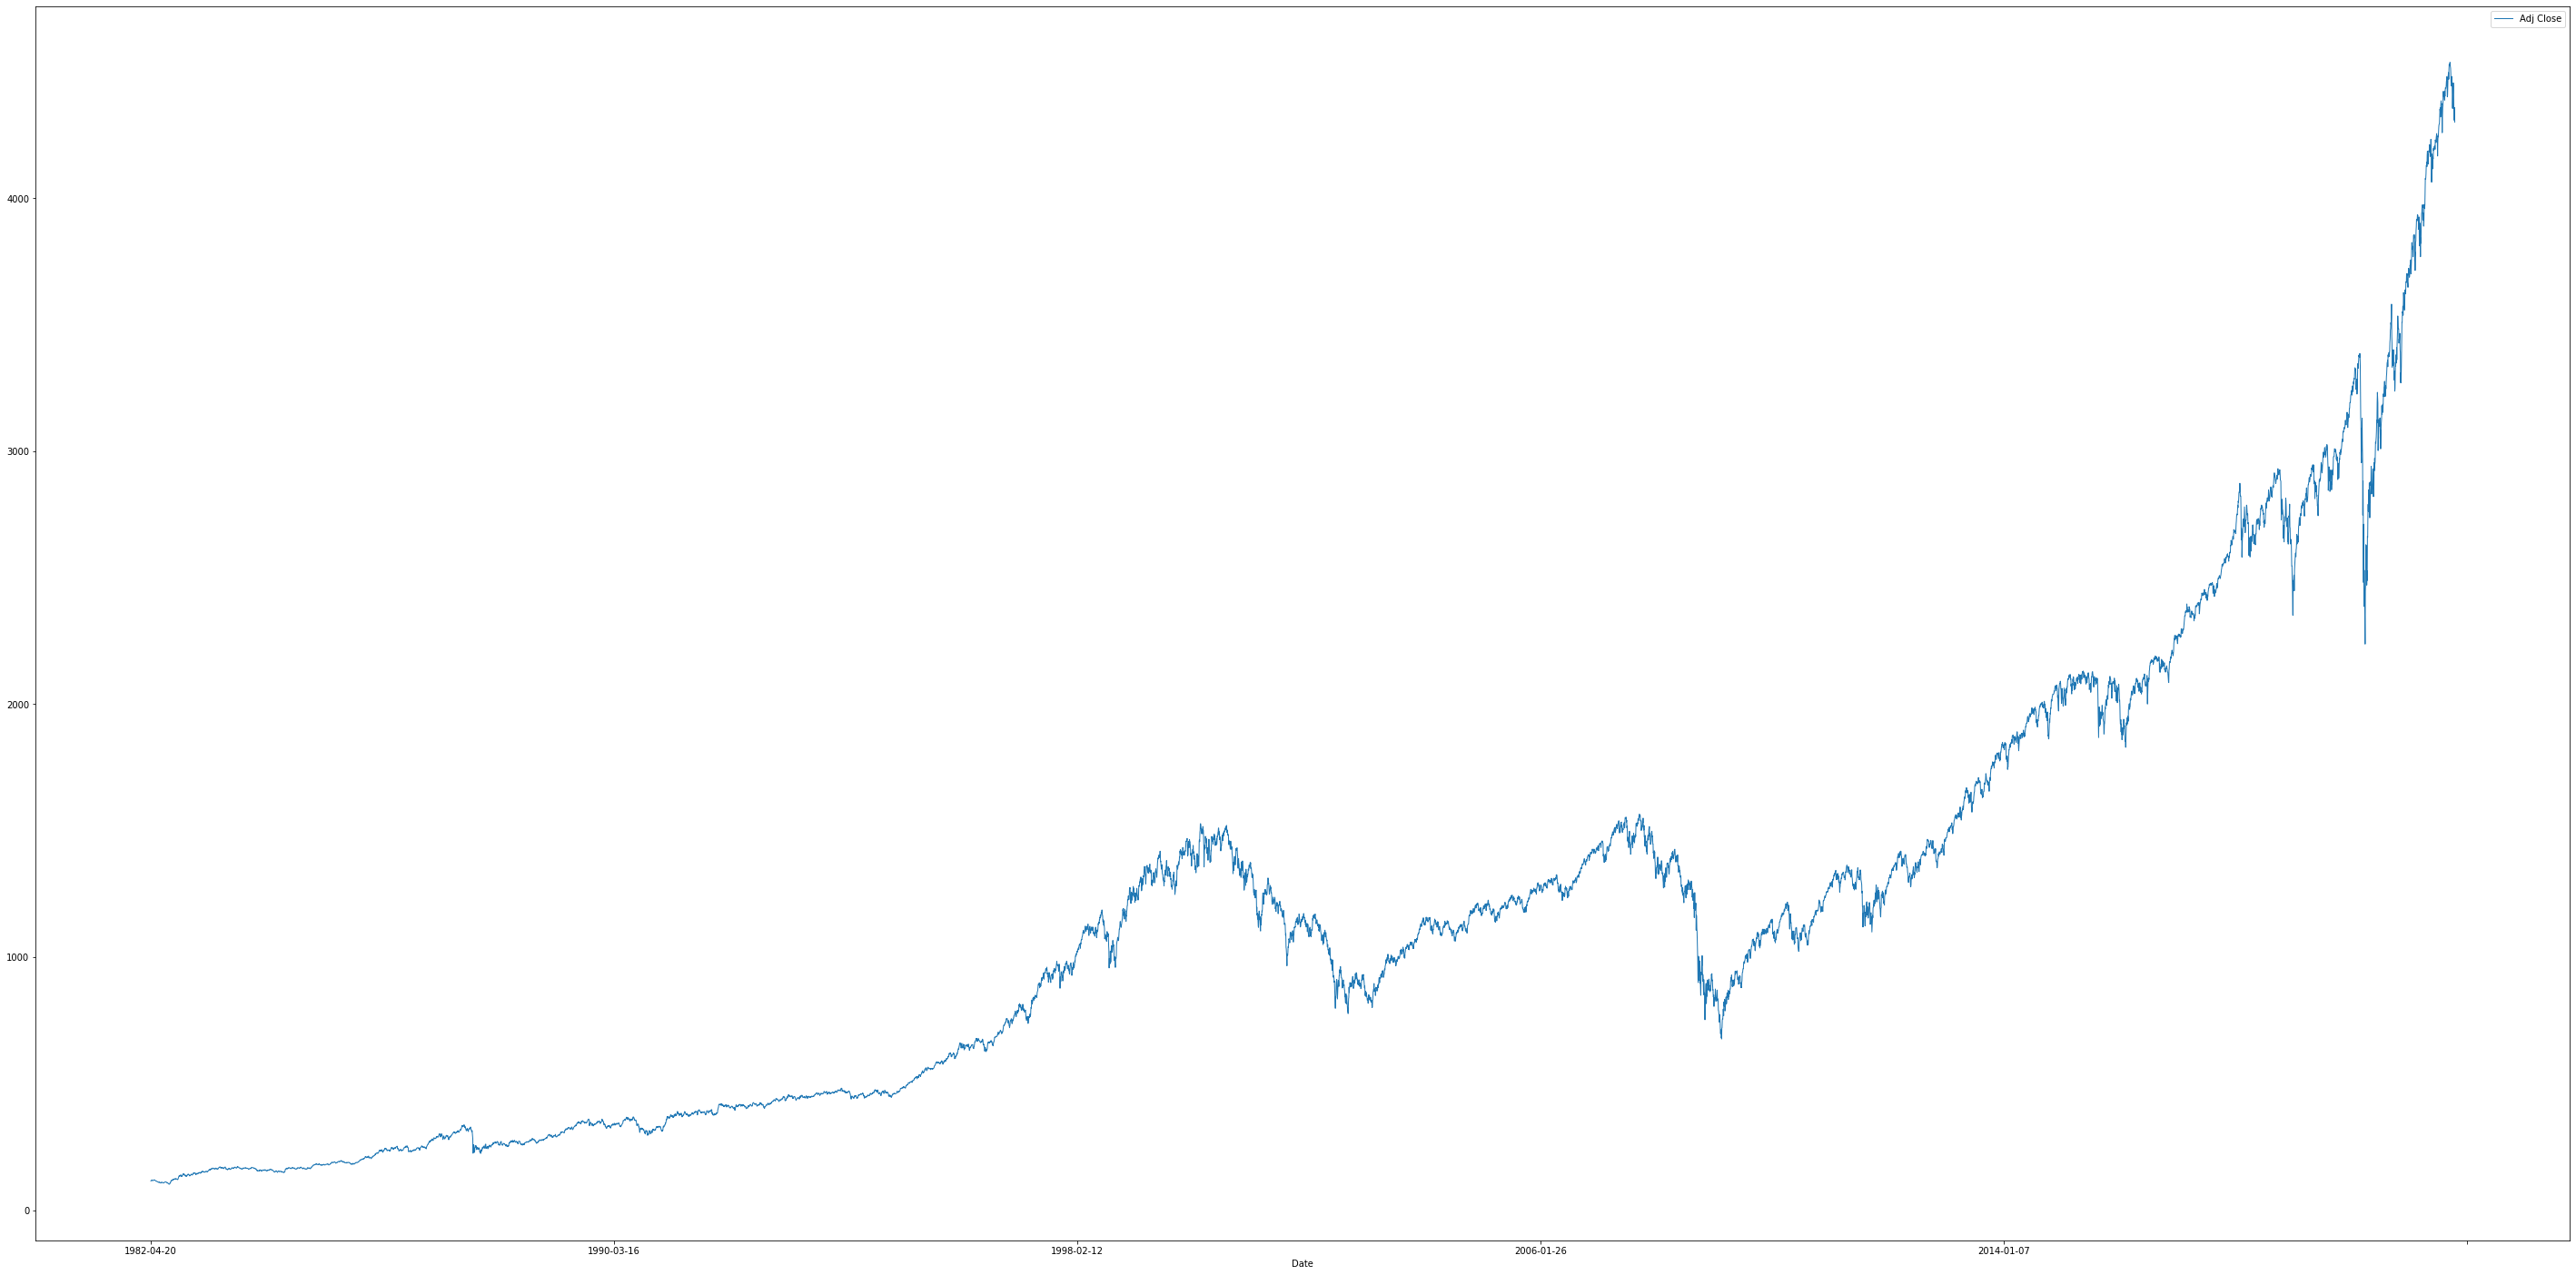

In [26]:
df.plot(x='Date', y="Adj Close", figsize=(50,25),linewidth=1)

In [28]:
training_data = ListDataset([{"start": df.index[0], "target": df["Adj Close"]}],freq = "1D")

In [29]:
# estimator = DeepAREstimator(freq="1D", prediction_length=365, trainer=Trainer(epochs=1000))#much better predictions

In [30]:
estimator = DeepAREstimator(freq="1D", prediction_length=365, trainer=Trainer(epochs=10))

In [32]:
predictor = estimator.train(training_data=training_data)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:33<00:00,  1.47it/s, epoch=4/4, avg_epoch_loss=4.51]


In [34]:
test_data = ListDataset([{"start": df.index[0], "target": df["Adj Close"]}],freq = "1D")

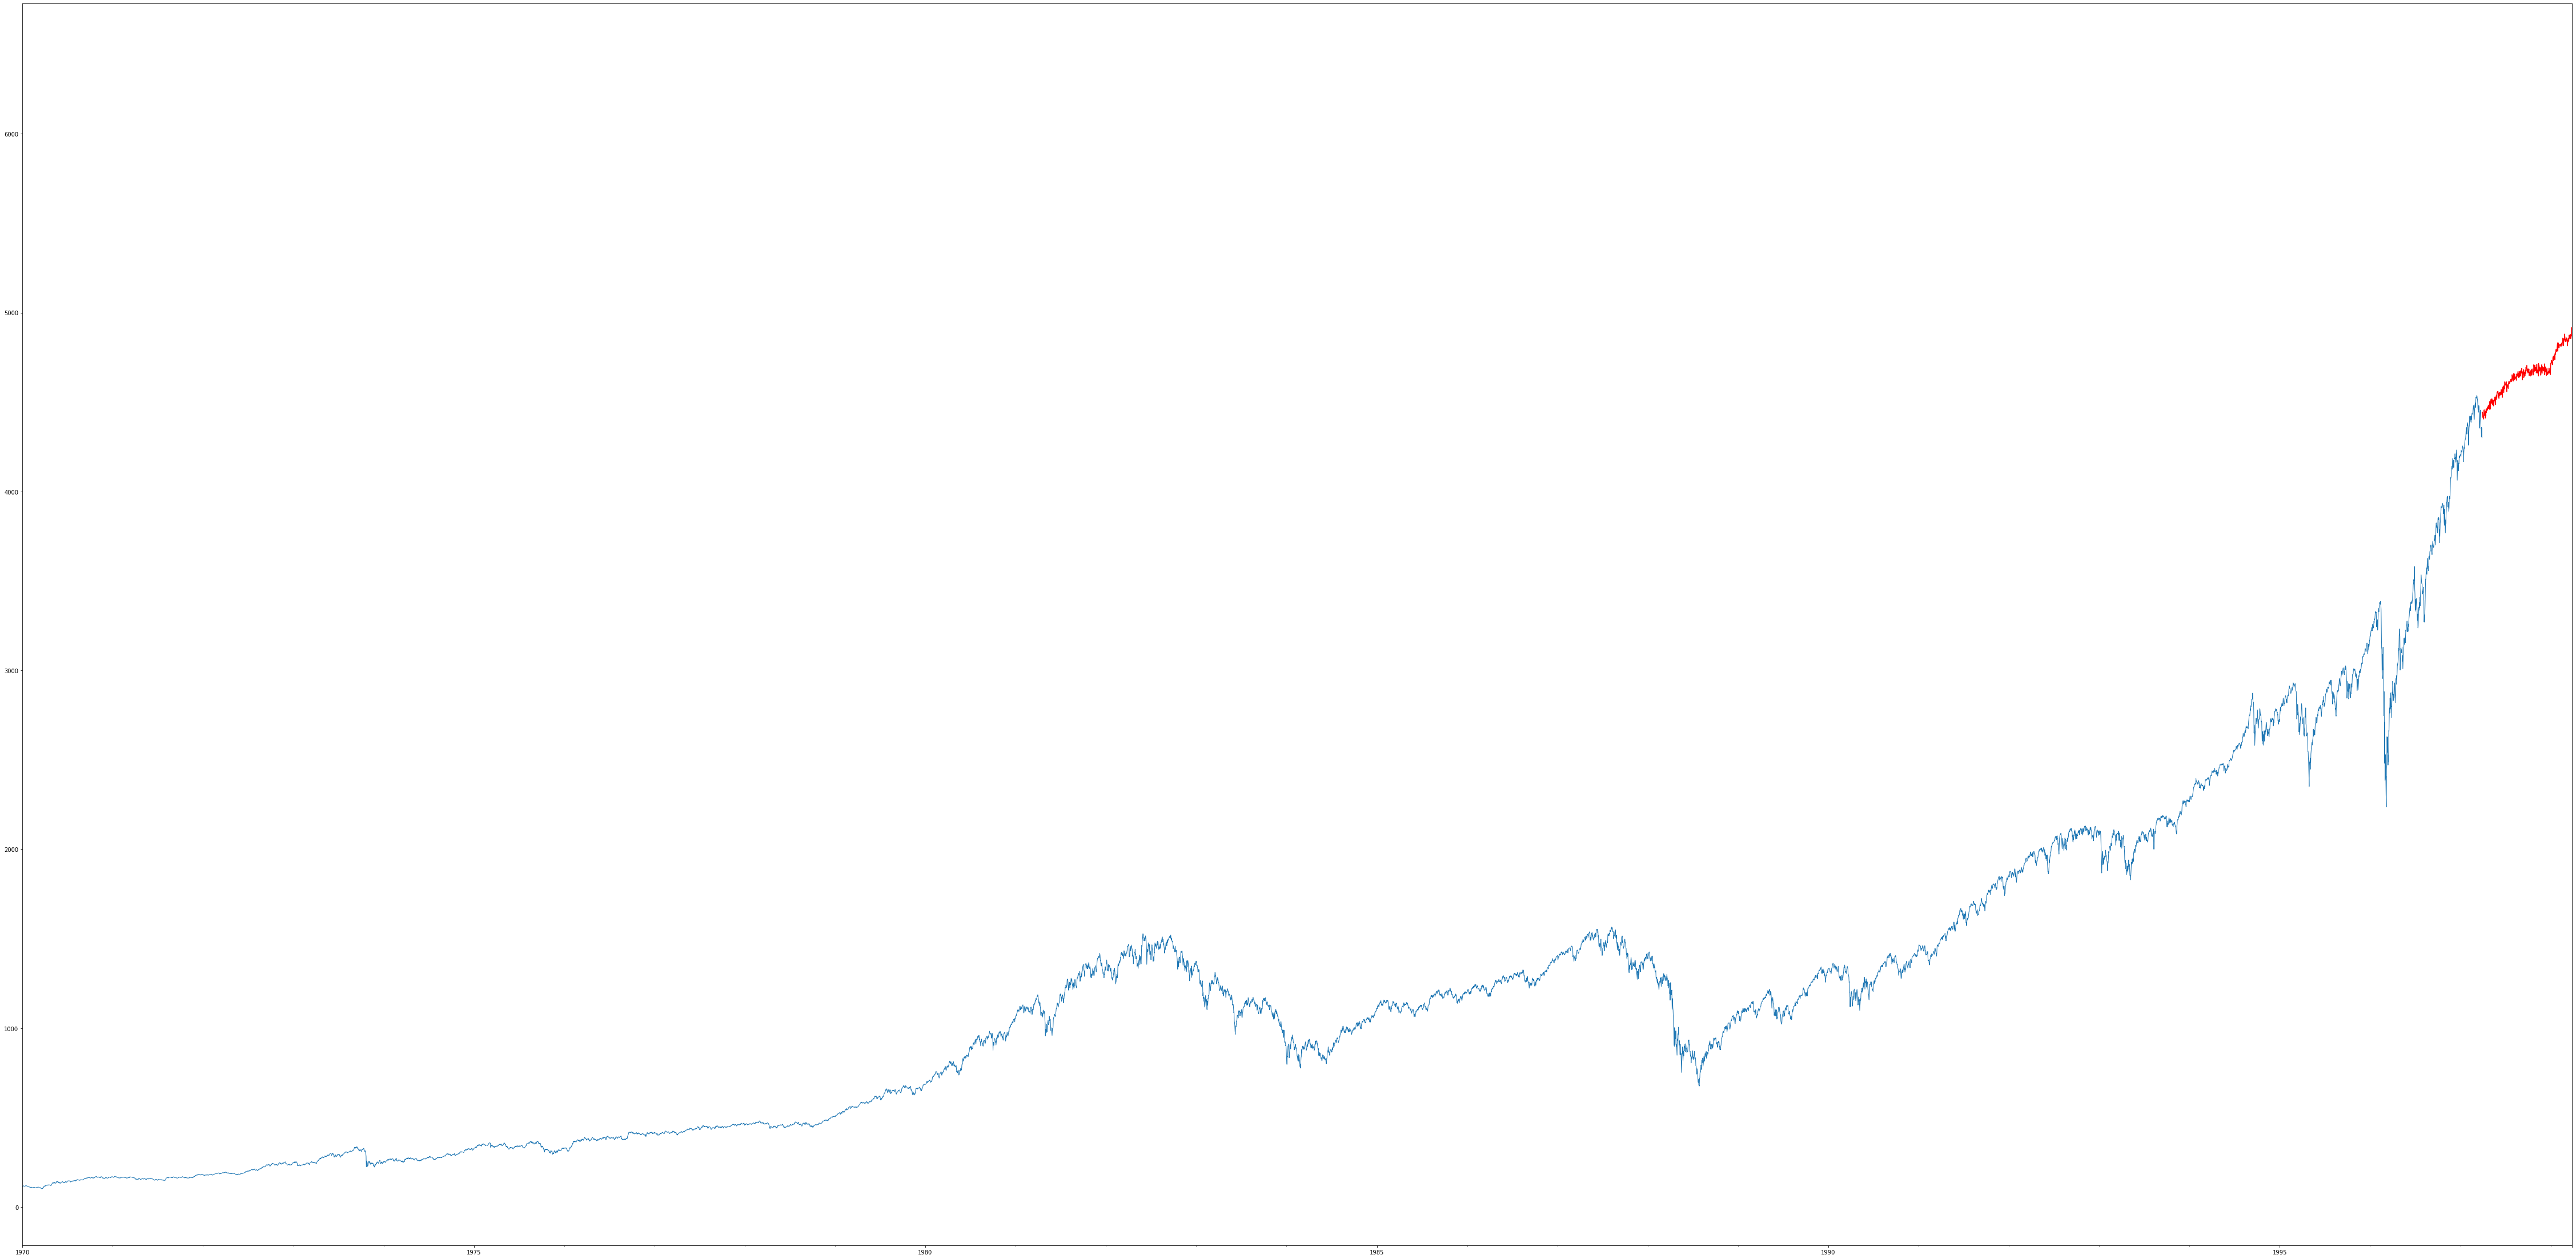

In [35]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-30000:].plot(figsize=(80,40),linewidth=1)
    forecast.plot(color='r', prediction_intervals=[100.0, 100.0])

plt.plot(which='both')
plt.show()

In [137]:
print(predictor.predict(test_data))

<generator object GluonPredictor.predict at 0x7fde81287ac0>
